In [136]:
%matplotlib inline
import numpy as np
import torch
from PIL import Image
from torch.utils.data.dataset import Dataset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

FOLDER_DATASET = "data/"

transformation = transforms.Compose([
transforms.RandomCrop(224),
transforms.ToTensor(),
])

class FrameData(Dataset):

    def __init__(self, FOLDER_DATASET, file_name, transform=None):
        self.__xs = []
        self.__ys = []
        self.transform = transform
        # counter = 0
        with open(FOLDER_DATASET + file_name) as f:
            for line in f:
                # counter += 1
                self.__xs.append(FOLDER_DATASET + "UCF101_images/" + line.split()[0])
                self.__ys.append(np.float32(line.split()[1]) )
#             print(counter)

    # Override to give PyTorch access to any image on the dataset
    def __getitem__(self, index):
        img = Image.open(self.__xs[index])
        img = img.convert('RGB')
        if self.transform is not None:
            img = self.transform(img)
        else:
            img = torch.FloatTensor(np.asarray(img).astype(int))
#             img = torch.FloatTensor([img0, img1])
        # Convert image and label to torch tensors
        label = torch.from_numpy(np.asarray(self.__ys[index]).reshape([1]))
        return img, label

    # Override to give PyTorch size of dataset
    def __len__(self):
        return len(self.__xs)


In [137]:
train = FrameData(FOLDER_DATASET, "image_train1.txt",transformation)

In [138]:
len(train)

75

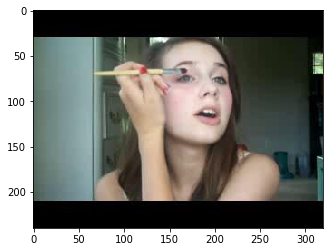

In [135]:
plt.imshow(train[0][0].numpy().transpose((1,2,0)))